In [12]:
import ensemble
import importlib
importlib.reload(ensemble) #this is for notebooks - otherwise I have to restart the kernel every time I change anything

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

# Boston Housing

In [23]:

boston  =  load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

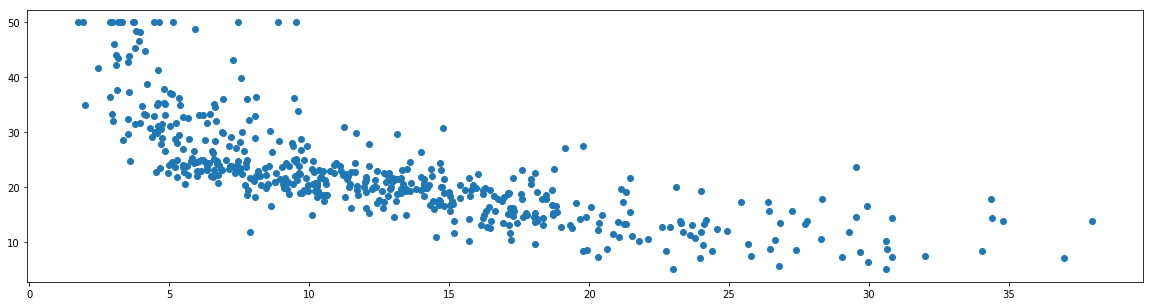

In [42]:
plt.scatter(X[:,12],y)

## mixed

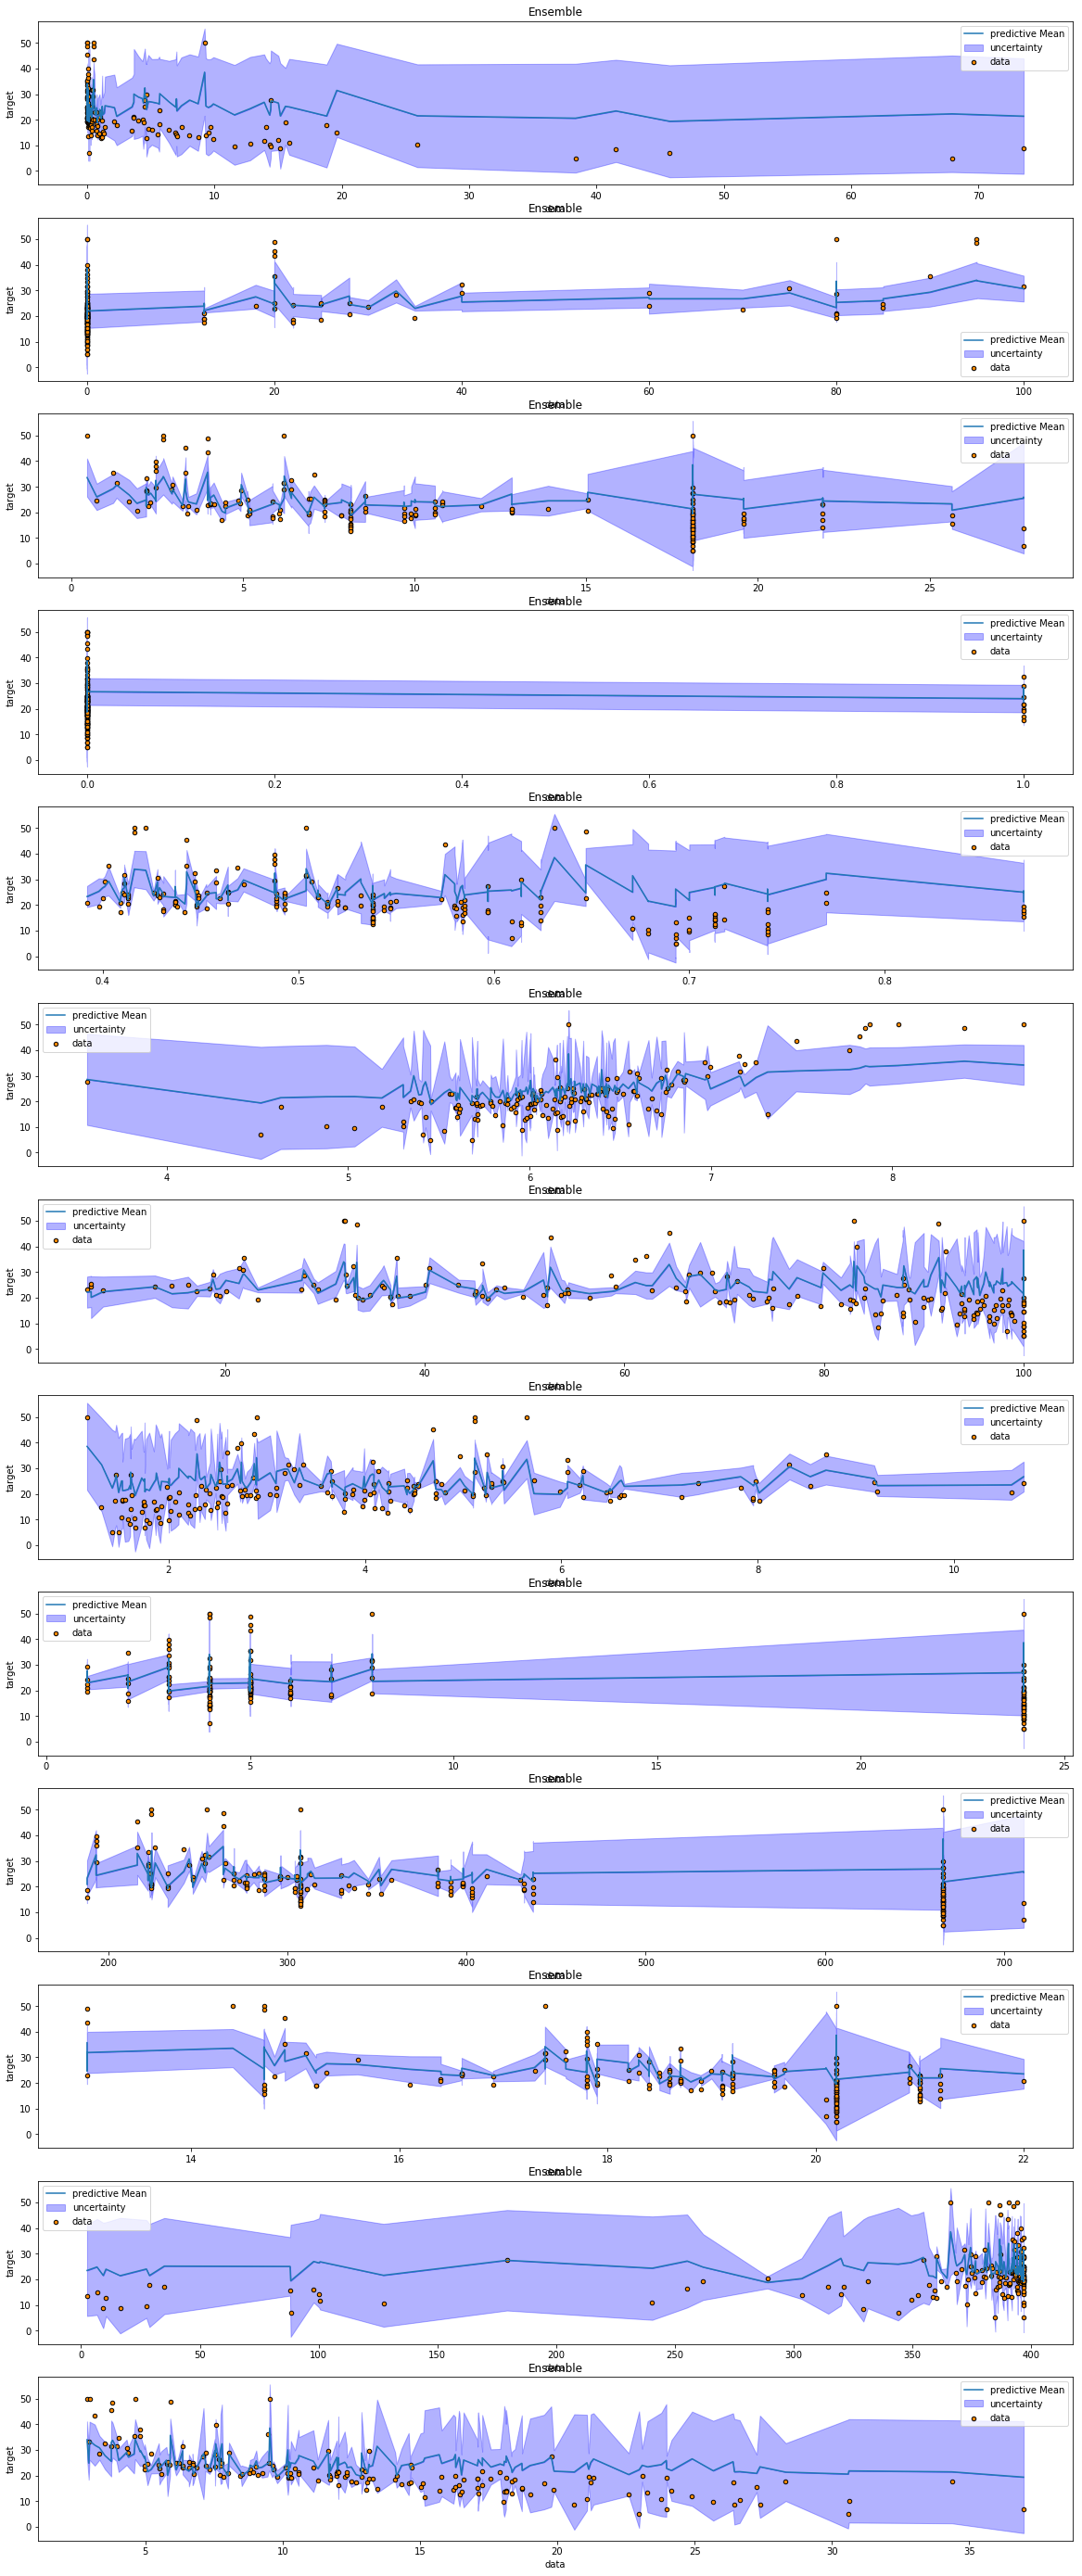

In [49]:

mixed_ensemblemixed_en  = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR(),
                                                           RandomForestRegressor()])
mixed_ensemble.fit(X_train,y_train)
y_hat,std  = mixed_ensemble.predict(X_test,std=True)
mixed_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

In [50]:
mixed_ensemble.self_evaluate(X_test,y_test)


{'NLPD': -6.487558122836337,
 'correlation between error and variance': 0.6871051796599782,
 'coverage probability': 0.7964071856287425,
 'rsme': 7.682648317227582}

## Trees

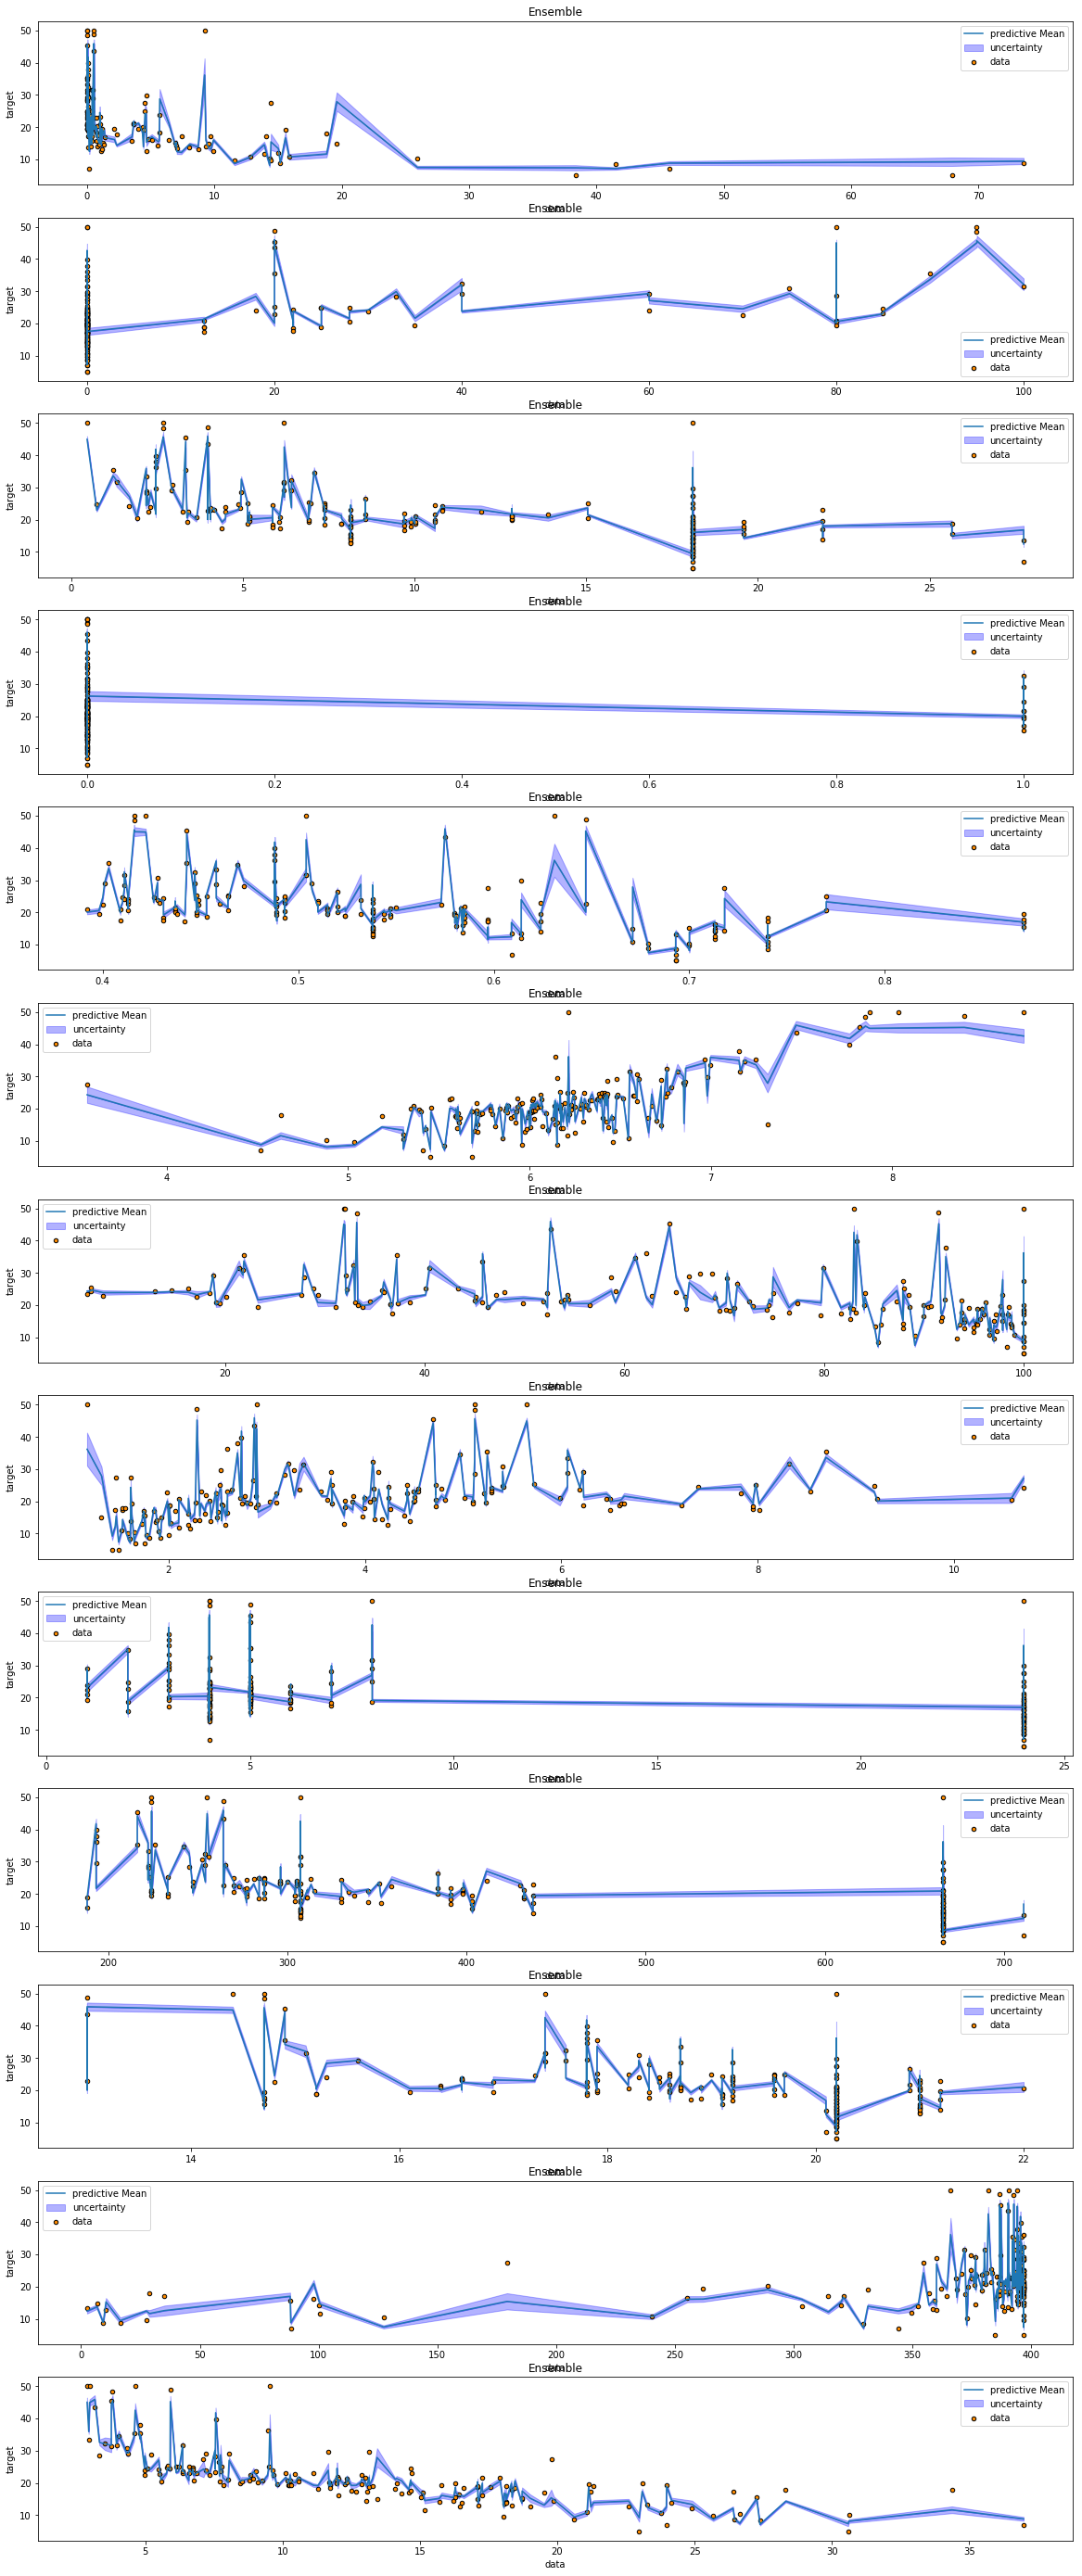

In [43]:
treeEnsemble = ensemble.RegressionEnsemble(10,RandomForestRegressor)
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test)

In [48]:
treeEnsemble.self_evaluate(X_test,y_test)


{'NLPD': -9.27695103899092,
 'correlation between error and variance': 0.539708953156666,
 'coverage probability': 0.23952095808383234,
 'rsme': 3.156476424616803}

## Bootstrap


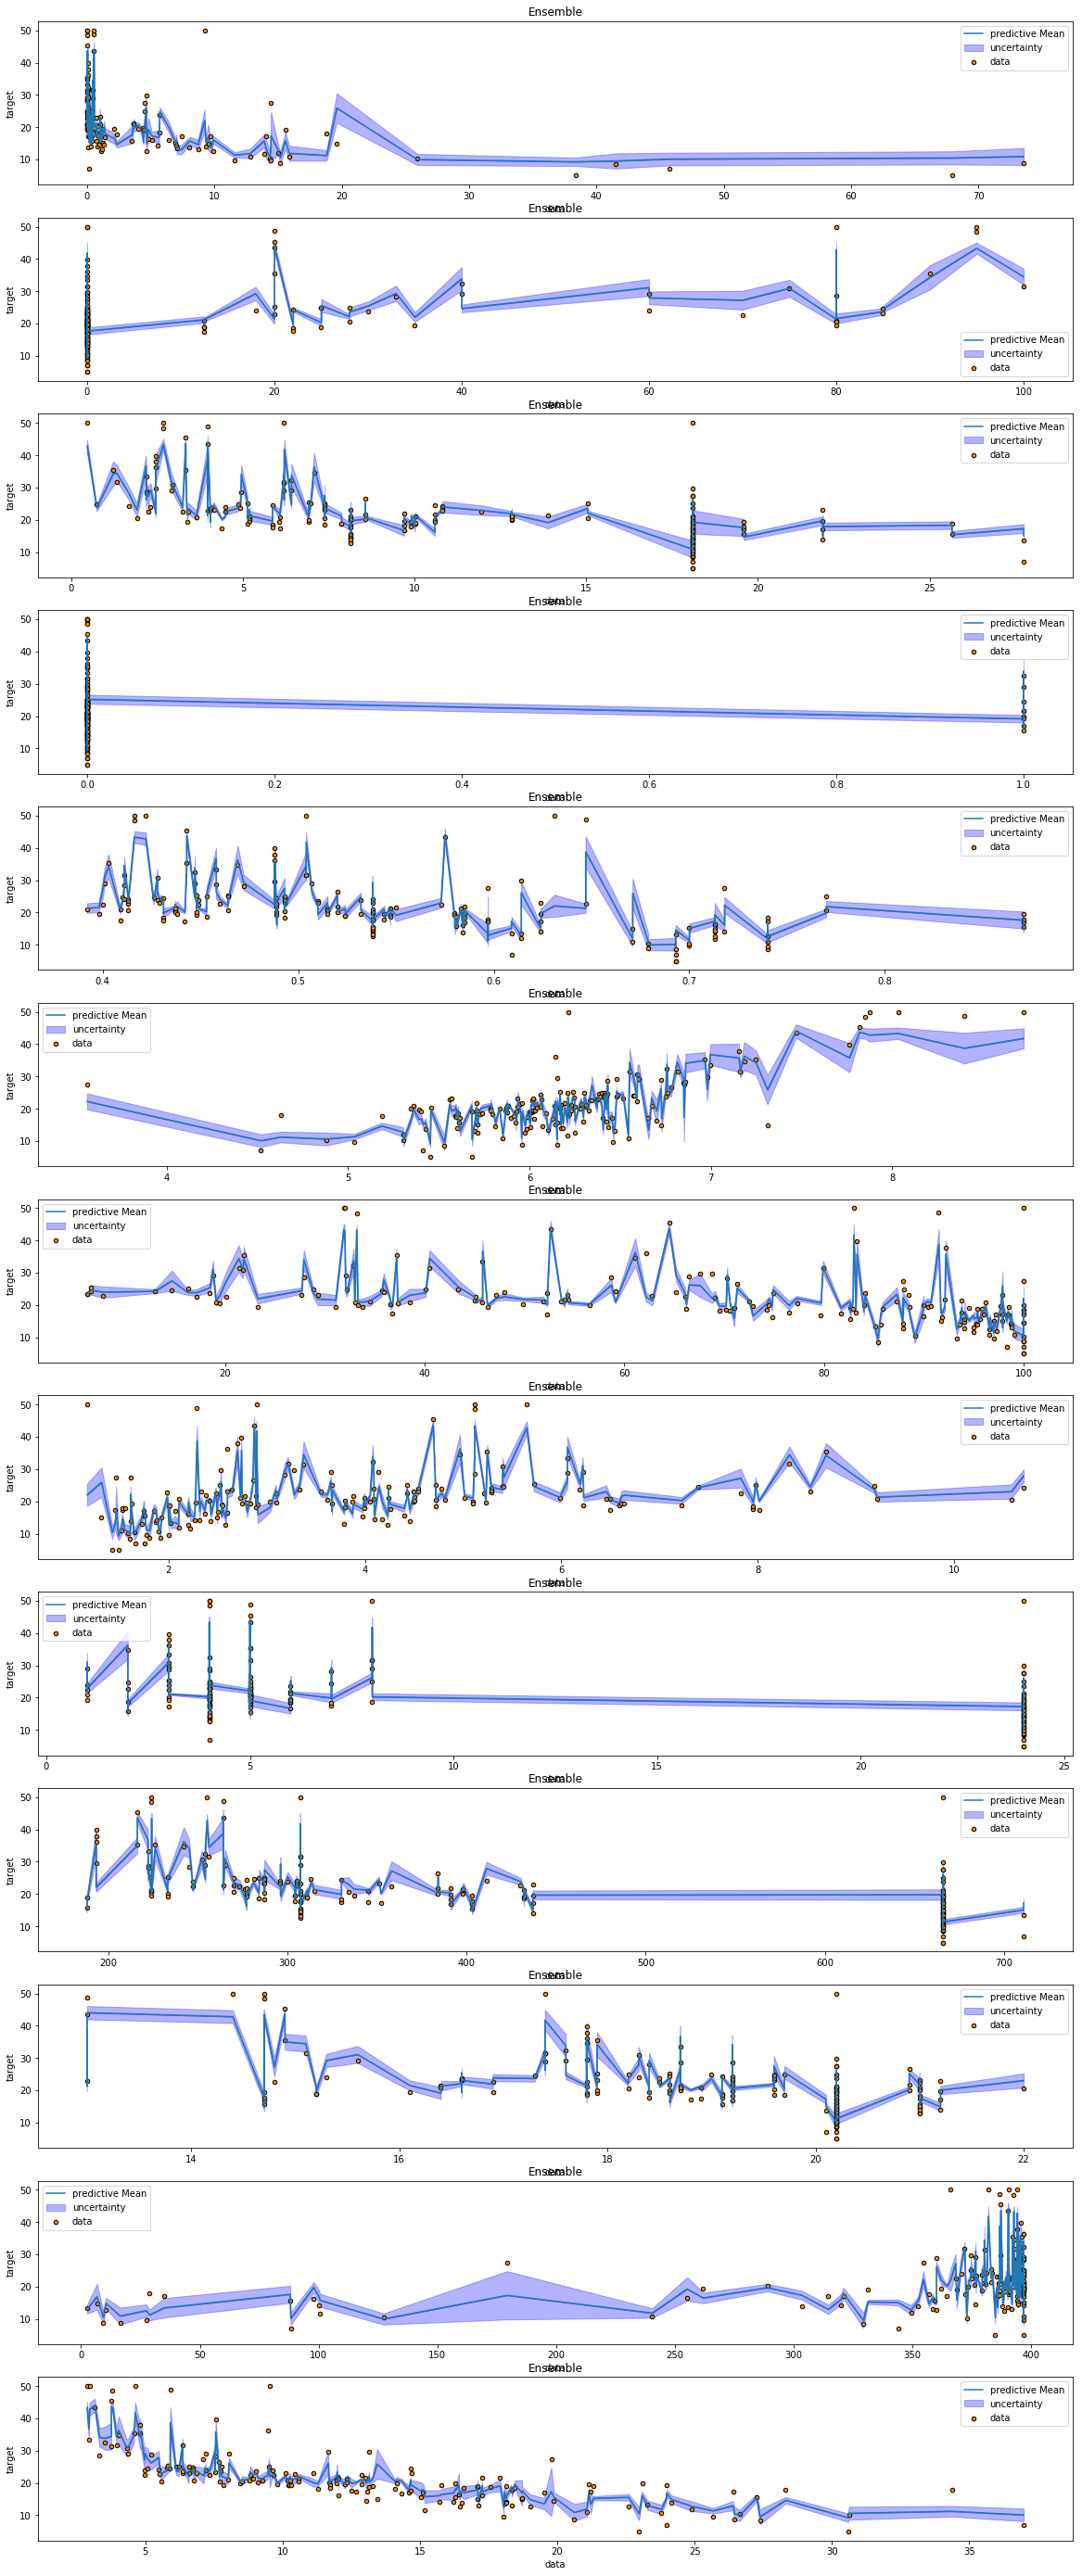

In [46]:
bootstrap_ensemble = ensemble.BootstrapEnsemble(model_type=RandomForestRegressor)


bootstrap_ensemble.fit(X_train,y_train)
y_hat,std  = bootstrap_ensemble.predict(X_test,std=True)
bootstrap_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

In [47]:
bootstrap_ensemble.self_evaluate(X_test,y_test)


{'NLPD': -7.542236622637561,
 'correlation between error and variance': 0.2577002432994974,
 'coverage probability': 0.41317365269461076,
 'rsme': 3.853692382124954}